# Agenda


- Part-I: Data visualization

  - Best practices and bad practices

  - Examples and resources

- Part-II: Matplotlib

  - Anatomy of a plot

  - Subplots

  - Bar charts and histograms

- Hands on experiments

# Part-I

[Reddit - Data is beatiful](https://www.reddit.com/r/dataisbeautiful/)

[Reddit - Data is Ugly](https://www.reddit.com/r/dataisugly/)


https://faculty.ucmerced.edu/jvevea/classes/Spark/readings/Cairo2015_Chapter_GraphicsLiesMisleadingVisuals.pdf

## Discussion


- [Data Storytelling Tips](https://visme.co/blog/data-storytelling-tips/) : Section: Examples of How to Improve Data Storytelling

# Part-II

## Matplotlib



In [1]:
# import matplotlib
import matplotlib.pyplot as plt


- There are two modes of matplotlib: 'pyplot' and 'object oriented'. Now we will work in the 'pyplot' mode.

- You can do more with object-oriented API but it requires more knowledge about the structure of the package. 

- On the other hand, pyplot API is very handy however it is not as flexible as object-oriented API.

- Creating a visualization is as simple as:

### Basic Plots

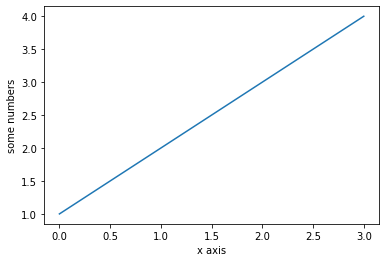

In [3]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.xlabel('x axis')
plt.show()

[Pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)

Changing styles

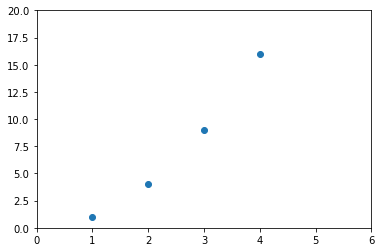

In [14]:
# plot o's with red color
# try squares and dashes also
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'o')

# plt.axis(xmin, xmax, ymin, ymax)
plt.axis([0, 6, 0, 20])

plt.show()

- In addition to lists matplotlib can work with numpy arrays (in fact this is more practical and common.) 

- Also we can plot multiple lines into the same figure.

In [15]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)
print(t)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8]


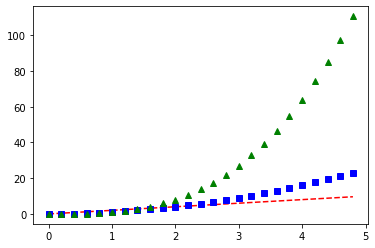

In [19]:
# red dashes, blue squares and green triangles
plt.plot(t, 2*t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

# plt.plot(t, 2*t, 'r--')
# plt.plot(t, t**2, 'bs')
# plt.plot(t, t**3, 'g^')

plt.show()

### Subplots

In [20]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

In [23]:
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

# t1, t2

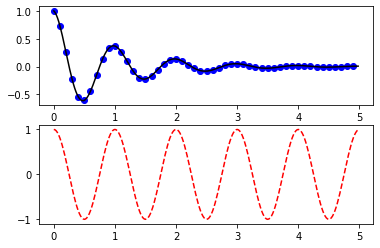

In [24]:
plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()


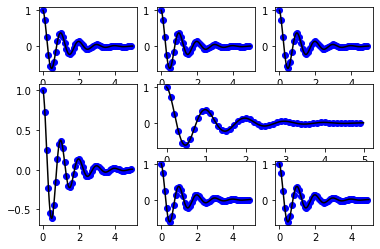

In [40]:
# Examples

plt.figure()
plt.subplot(3,3,1)
plt.plot(t1, f(t1), 'bo')
plt.plot(t2, f(t2), 'k')

plt.subplot(3,3,2)
plt.plot(t1, f(t1), 'bo')
plt.plot(t2, f(t2), 'k')

plt.subplot(3,3,3)
plt.plot(t1, f(t1), 'bo')
plt.plot(t2, f(t2), 'k')

plt.subplot(3,3, (4, 7))
plt.plot(t1, f(t1), 'bo')
plt.plot(t2, f(t2), 'k')

plt.subplot(3,3,(5, 6))
plt.plot(t1, f(t1), 'bo')
plt.plot(t2, f(t2), 'k')

plt.subplot(3,3,8)
plt.plot(t1, f(t1), 'bo')
plt.plot(t2, f(t2), 'k')

plt.subplot(3,3,9)
plt.plot(t1, f(t1), 'bo')
plt.plot(t2, f(t2), 'k')

plt.show()

### Working with text

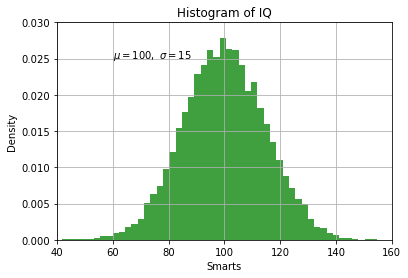

In [43]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Density')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')

plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

### Bar plots and Histograms

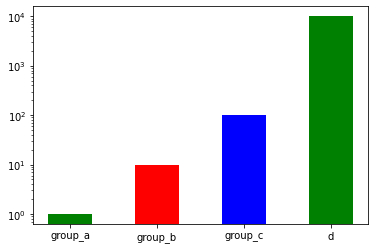

In [56]:
names = ['group_a', 'group_b', 'group_c', 'd']
values = [1, 10, 100, 10000]


plt.bar(names, values, color=['green', 'red','blue'], log=True, align='center', width=.5)
plt.draw()

[Source](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)

 Other parameters:

 - `color`
 - `log` True
 - `align`: 'edge' and `width` = 0.2 vs 0.5


### Histograms


A histogram is an approximate representation of the distribution of numerical data. It was first introduced by Karl Pearson. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent and are often (but not required to be) of equal size.

(array([4.0000e+00, 2.0000e+01, 8.9000e+01, 3.1300e+02, 8.7200e+02,
        2.2060e+03, 4.5680e+03, 8.1810e+03, 1.2324e+04, 1.5505e+04,
        1.6759e+04, 1.5035e+04, 1.0885e+04, 6.9190e+03, 3.7470e+03,
        1.6840e+03, 6.2900e+02, 1.9600e+02, 5.4000e+01, 1.0000e+01]),
 array([0.33622441, 0.78637749, 1.23653056, 1.68668364, 2.13683672,
        2.58698979, 3.03714287, 3.48729594, 3.93744902, 4.38760209,
        4.83775517, 5.28790824, 5.73806132, 6.18821439, 6.63836747,
        7.08852055, 7.53867362, 7.9888267 , 8.43897977, 8.88913285,
        9.33928592]),
 <BarContainer object of 20 artists>)

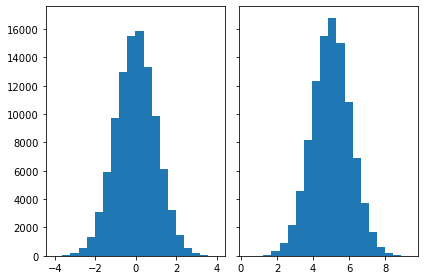

In [57]:
N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

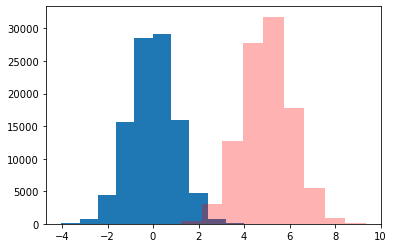

In [63]:
plt.hist(x)
plt.hist(y, color='red', alpha=.3)

plt.show()

__Histogram - Extra__

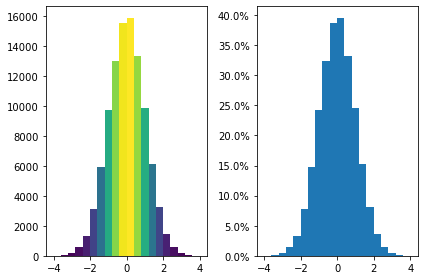

In [64]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(x, bins=n_bins)
# print(patches)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(x, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

[Source](https://matplotlib.org/stable/gallery/statistics/hist.html)

### Box Plots

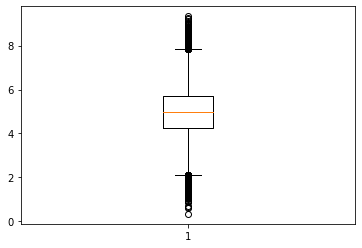

In [70]:
plt.boxplot(y);
# plt.show()

Things to do:

- Explain Q1, Q3, IQR and outlier computations

- Mention drawbacks of boxplots -- distributions is not very clear. (mention violin plots?)

# Part-III

[Kaggle - NBA Players Data](https://www.kaggle.com/justinas/nba-players-data)



In [71]:
import pandas as pd

nba_players = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS601_Fall21/main/Week02/data/all_seasons.csv', index_col = 0)


In [72]:
nba_players.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

## Scatter Plot 

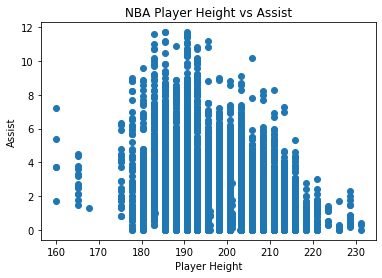

In [74]:
plt.scatter(nba_players.player_height, nba_players.ast)
# change x-label
plt.xlabel('Player Height')

# change y-label
plt.ylabel('Assist')

# change title
plt.title('NBA Player Height vs Assist')

plt.draw()

(array([2999., 3300., 2162., 1461.,  841.,  544.,  229.,  131.,   29.,
           4.]),
 array([ 0.  ,  3.61,  7.22, 10.83, 14.44, 18.05, 21.66, 25.27, 28.88,
        32.49, 36.1 ]),
 <BarContainer object of 10 artists>)

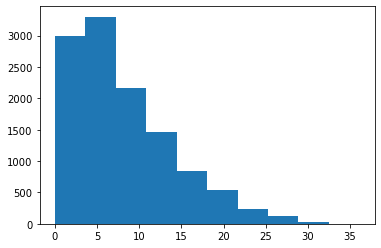

In [75]:
plt.hist(nba_players.pts)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9725014640>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9725014d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f97250142e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f972501e430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f972501e790>],
 'means': []}

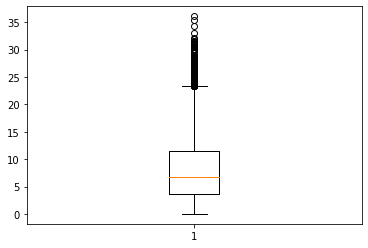

In [76]:
plt.boxplot(nba_players.pts)

In [77]:
# lets check outliers
nba_players[nba_players.pts >25].player_name.unique()

array(['Mitch Richmond', 'Michael Jordan', 'Karl Malone',
       "Shaquille O'Neal", 'Glen Rice', 'Allen Iverson', 'Vince Carter',
       'Grant Hill', 'Paul Pierce', 'Jerry Stackhouse', 'Kobe Bryant',
       'Chris Webber', 'Tracy McGrady', 'Tim Duncan', 'Dirk Nowitzki',
       'LeBron James', "Amar'e Stoudemire", 'Gilbert Arenas',
       'Dwyane Wade', 'Carmelo Anthony', 'Ray Allen', 'Michael Redd',
       'Kevin Durant', 'Danny Granger', 'Monta Ellis', 'Kevin Love',
       'James Harden', 'Russell Westbrook', 'Damian Lillard',
       'DeMarcus Cousins', 'Stephen Curry', 'Kawhi Leonard',
       'Karl-Anthony Towns', 'Kyrie Irving', 'DeMar DeRozan',
       'Anthony Davis', 'Isaiah Thomas', 'Giannis Antetokounmpo',
       'Paul George', 'Kemba Walker', 'Devin Booker', 'Bradley Beal',
       'Joel Embiid', 'Zach LaVine', 'Trae Young', 'Luka Doncic',
       'Zion Williamson', 'Donovan Mitchell', 'Jayson Tatum',
       "De'Aaron Fox", 'Nikola Jokic'], dtype=object)

In [78]:
nba_players.reb.value_counts()

2.0     302
1.8     279
1.9     273
2.3     267
1.5     257
       ... 
16.1      1
14.5      1
14.0      1
14.2      1
13.4      1
Name: reb, Length: 152, dtype: int64

(array([2613., 3794., 2524., 1353.,  693.,  373.,  223.,   81.,   35.,
          11.]),
 array([ 0.  ,  1.63,  3.26,  4.89,  6.52,  8.15,  9.78, 11.41, 13.04,
        14.67, 16.3 ]),
 <BarContainer object of 10 artists>)

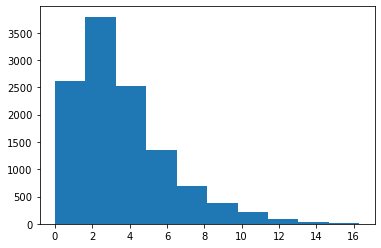

In [79]:
plt.hist(nba_players.reb)

# Part-IV

## Lab Part1

Please choose appropriate graph and visualize the followings with correct/appropriate labels

* Height only
* Points only
* Height vs Points

In [ ]:
import pandas as pd

nba_players = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS601_Fall21/main/Week02/data/all_seasons.csv', index_col = 0)

height = nba_players['player_height']
points = nba_players['pts']

## Lab Part2
Please visualize year vs score with correct/appropriate labels

In [ ]:
bowling_data = pd.read_csv("https://raw.githubusercontent.com/msaricaumbc/DS601_Fall21/main/Week02/data/bowling_stats.csv",
                            header=None,
                            names=['year','city','state','count1','count2'])
def merge_columns(row):
    if pd.isna(row['count2']):
        return row['count1']
    else:
        return row['count1']*1000+row['count2']
    
bowling_data['total']=bowling_data.apply(merge_columns,axis=1)

year = bowling_data['year']
score = bowling_data['total']